In [1]:
import os
from os import sys
sys.path.append('/Users/chang/X-ray-chemistry/KROME/AGN/data')
import numpy as np
import matplotlib.pyplot as plt
from species import *

All variables set as e.g. krome_idx_H2
plot 'your_output' u 1:krome_idx_H2
 the offset is nkrome= 0


In [2]:
os.system('make gfortran')
for i in range(8):
    dis = i+1
    nH = 'ratexH'+str(dis)+'.dat'
    nHe = 'ratexHe'+str(dis)+'.dat'
    orderH = 'cat ' + nH + ' > ratexH.dat'
    os.system(orderH)
    orderHe = 'cat ' + nHe + ' > ratexHe.dat'
    os.system(orderHe)
    os.system('./test')
    command = 'cat ./data/dis > ./data/dis' + str(dis)
    os.system(command)
os.system('rm dis')
os.system('cowsay -f www I feel ok')

0

In [5]:
Col = ['#b2182b','#d6604d','#f4a582','#fddbc7','#d1e5f0','#92c5de','#4393c3','#2166ac']
def plot_fig(txt, col, spe, div = None):
    raw = np.loadtxt(txt)
    t = raw[:,0]
    d = 'xH'
    abu = raw[:,eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:,eval('krome_idx_' + div)]
        d = 'n' + div
    plt.loglog(t, abu, label = txt[-1]+' kpc', color = col)
    plt.xlabel(r'$t$ (yr)', fontsize = 25)
    plt.ylabel(r'$n$'+spe.replace('j','+').replace('k','-')+'/'+d, fontsize = 25)
    plt.legend()

def plot_all(spe, div = None, d = None):
    if d == None:
        d = np.arange(8)+1
    for i in d:
        txt = './data/dis'+str(i)
        plot_fig(txt, Col[i-1], spe, div)
    #plt.show()

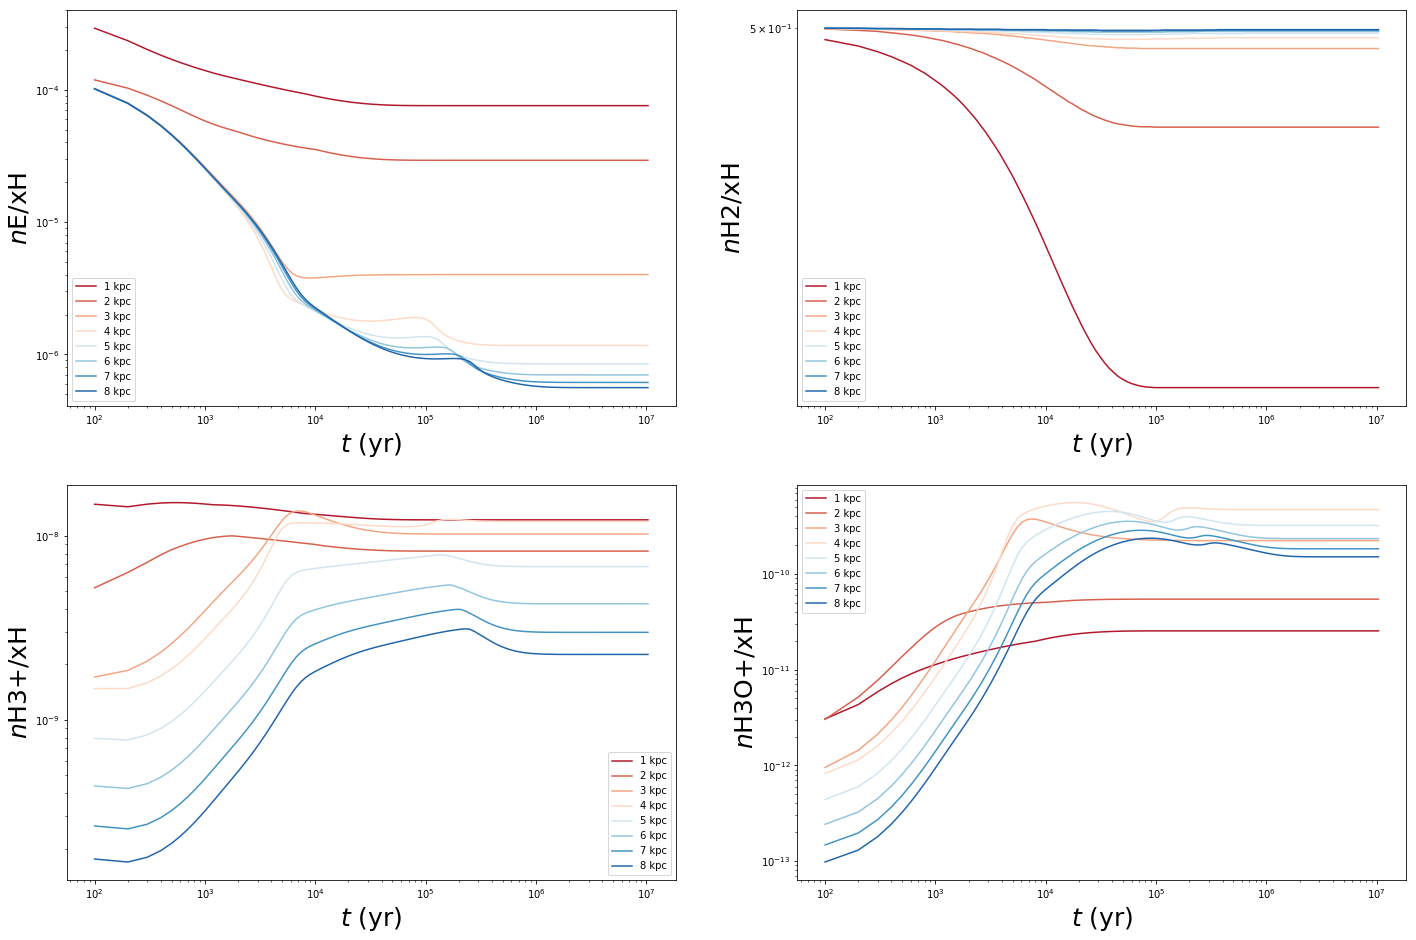

In [8]:
plt.figure(1, figsize = (24,16))
plt.subplot(221)
plot_all('E')
plt.subplot(222)
plot_all('H2')
plt.subplot(223)
plot_all('H3j')
plt.subplot(224)
plot_all('H3Oj')

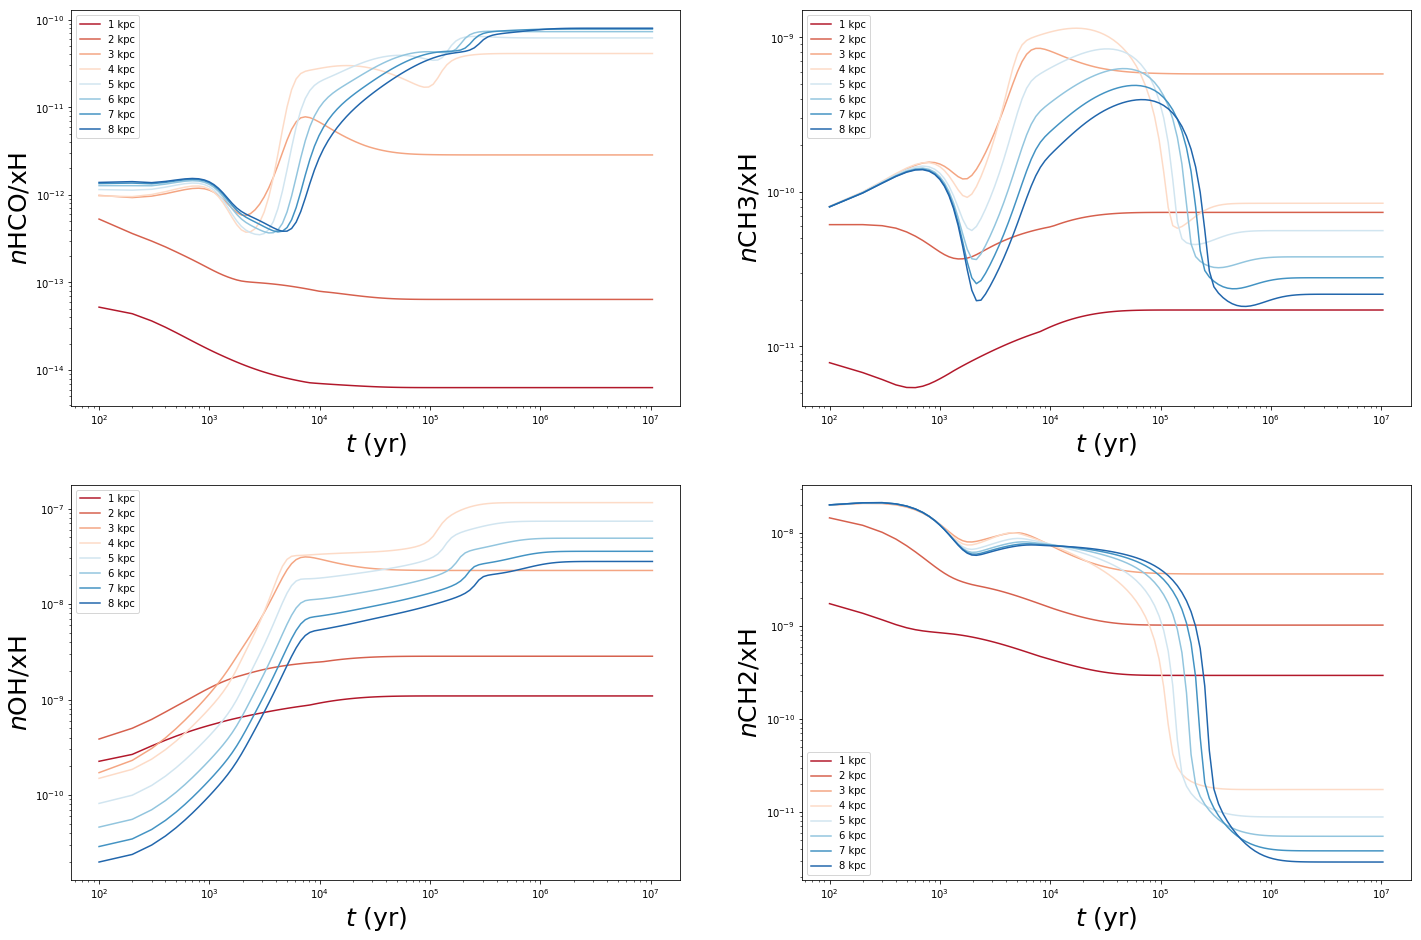

In [7]:
plt.figure(1, figsize = (24,16))
plt.subplot(221)
plot_all('HCO')
plt.subplot(222)
plot_all('CH3')
plt.subplot(223)
plot_all('OH')
plt.subplot(224)
plot_all('CH2')